In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\tgerrish\Documents\GitHub\BHoM\LadybugTools_Toolkit\LadybugTools_Engine\Python\honeybee_extension\results.py:28: UserWarning: There are duplicate filenames in the list of input files for _load_sql_file.         This may cause issues when trying to reference specific results sets!
  )


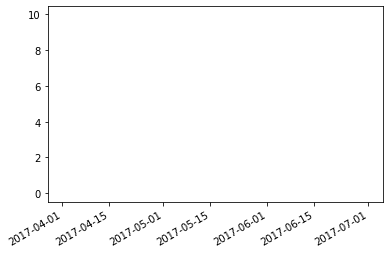

In [4]:
from honeybee_extension.results import load_sql, load_ill, load_pts, load_res

sql = load_sql([
    r"C:\Users\tgerrish\simulation\results_test\openstudio\run\eplusout.sql", 
    r"C:\Users\tgerrish\simulation\results_test\openstudio\run\eplusout.sql"
])

pts = load_pts([
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\model\grid\Room_15.pts",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\model\grid\Room_16.pts",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\model\grid\Room_13.pts",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\model\grid\Room_14.pts",
])

ill = load_ill([
    r"C:\Users\tgerrish\simulation\results_test\annual_irradiance\results\total\Room_15.ill",
    r"C:\Users\tgerrish\simulation\results_test\annual_irradiance\results\total\Room_16.ill",
    r"C:\Users\tgerrish\simulation\results_test\annual_irradiance\results\total\Room_13.ill",
    r"C:\Users\tgerrish\simulation\results_test\annual_irradiance\results\total\Room_14.ill",
]).iloc[:, 0].plot()

res = load_res([
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\results\Room_15.res",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\results\Room_16.res",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\results\Room_13.res",
    r"C:\Users\tgerrish\simulation\results_test\daylight_factor\results\Room_14.res",
])

cda = load_res([
    r"C:\Users\tgerrish\simulation\results_test\annual_daylight\metrics\cda\Room_15.cda",
    r"C:\Users\tgerrish\simulation\results_test\annual_daylight\metrics\cda\Room_16.cda",
    r"C:\Users\tgerrish\simulation\results_test\annual_daylight\metrics\cda\Room_13.cda",
    r"C:\Users\tgerrish\simulation\results_test\annual_daylight\metrics\cda\Room_14.cda",
])


<AxesSubplot:>

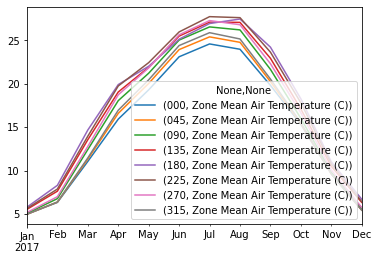

In [172]:
from honeybee_extension.results import Results, _load_ill, _load_sql

result = Results(r"C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95")


Loading Energyplus results from C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\energy.hdf
Loading Energyplus results from C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\openstudio\run\eplusout.sql
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irradiance\results\direct\00.ill
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irradiance\results\direct\01.ill
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irradiance\results\direct\02.ill
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irradiance\results\direct\03.ill
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irradiance\results\direct\04.ill
Loading C:\Users\tgerrish\simulation\SAMSUNG\1.3_0.2_0.2_0.2_0.2_0.6_0.6_0.95_0.95\annual_irra

In [174]:
from ladybug.header import Header
from ladybug.datatype.base import DataTypeBase
from ladybug.datatype import TYPESDICT
from ladybug.datatype.generic import GenericType
from ladybug.analysisperiod import AnalysisPeriod

str_elements = header_str.split(" ")
_unit = str_elements[-1].replace("(", "").replace(")", "")
_data_type = " ".join(str_elements[:-1])

try:
    _data_type = TYPESDICT[_data_type.replace(' ', '')]()
    print(
        Header(
            data_type=_data_type,
            unit=_unit,
            analysis_period=AnalysisPeriod()
        )
    )
except KeyError: # data type not known in source dict
    _data_type = GenericType(
        name=_data_type,
        unit=_unit
    )
    print(
        Header(
            data_type=_data_type,
            unit=_unit,
            analysis_period=AnalysisPeriod()
        )
    )



# data_type.from_string("Relative Humidity")

Dry Bulb Temperature (C)
1/1 to 12/31 between 0 and 23 @1


In [132]:
from ladybug.header import Header
from ladybug.analysisperiod import AnalysisPeriod

from extension.header import header_to_str, str_to_header

header = epw.relative_humidity.header
header_str = header_to_str(header)

str_elements = header_str.split(" ")
unit = str_elements[-1].replace("(", "").replace(")", "")
variable_str = " ".join(str_elements[:-1])
variable_str

from ladybug.datatype import TYPESDICT, UNITS
# from ladybug.datatype.generic.
try:
    # get dtype from unit
    dtype_str = [k for k, v in UNITS.items() if unit in v][0]
    dtype = TYPESDICT[dtype_str]
    
    # assign variable str as title
    # ...
    # header
    
    # _datatype = UNITS[unit]
except KeyError as msg:
    # generic thing instead
    # _datatype = 
    raise TypeError(msg)
header.data_type.from_string("Relative Humidity")



Relative Humidity

In [117]:
UNITS

{'Angle': ('degrees', 'radians'),
 'Area': ('m2', 'ft2', 'mm2', 'in2', 'km2', 'mi2', 'cm2', 'ha', 'acre'),
 'Current': ('A', 'mA'),
 'Distance': ('m', 'ft', 'mm', 'in', 'km', 'mi', 'cm'),
 'EnergyIntensity': ('kWh/m2',
  'kBtu/ft2',
  'Wh/m2',
  'Btu/ft2',
  'kWh/ft2',
  'kBtu/m2'),
 'Energy': ('kWh',
  'kBtu',
  'Wh',
  'Btu',
  'MMBtu',
  'J',
  'kJ',
  'MJ',
  'GJ',
  'therm',
  'cal',
  'kcal'),
 'EnergyFlux': ('W/m2', 'Btu/h-ft2', 'kW/m2', 'kBtu/h-ft2', 'W/ft2', 'met'),
 'Fraction': ('fraction', '%', 'tenths', 'thousandths', 'okta'),
 'Illuminance': ('lux', 'fc'),
 'Luminance': ('cd/m2', 'cd/ft2'),
 'Mass': ('kg', 'lb', 'g', 'tonne', 'ton', 'oz'),
 'MassFlowRate': ('kg/s', 'lb/s', 'g/s', 'oz/s'),
 'Power': ('W', 'Btu/h', 'kW', 'kBtu/h', 'TR', 'hp'),
 'Pressure': ('Pa', 'inHg', 'atm', 'bar', 'Torr', 'psi', 'inH2O'),
 'RValue': ('m2-K/W', 'h-ft2-F/Btu', 'clo'),
 'SpecificEnergy': ('kWh/kg', 'kBtu/lb', 'Wh/kg', 'Btu/lb', 'J/kg', 'kJ/kg'),
 'Speed': ('m/s', 'mph', 'km/h', 'knot', 'ft/

In [9]:
from bh_ladybug.analysisperiod import BH_AnalysisPeriod
from bh_ladybug.epw import BH_EPW

analysis_period = BH_AnalysisPeriod()
analysis_period.to_datetimes()

epw_path = r"C:\Users\tgerrish\BuroHappold\Sustainability and Physics - epws\POL_TERESPOL_123990_IW2.epw"

epw = BH_EPW(epw_path)

In [10]:
epw

AttributeError: _location

In [54]:
# Test the infinite issue

from bh_ladybug_comfort.collection.utci import BH_UTCI

a = BH_UTCI(epw.dry_bulb_temperature, epw.relative_humidity).universal_thermal_climate_index
b = BH_UTCI(epw.dry_bulb_temperature-2, epw.relative_humidity)#.universal_thermal_climate_index

# type((b - a))

type(a)
# epw.dry_bulb_temperature.header.to_dict()
# epw.dry_bulb_temperature

ladybug.datacollectionimmutable.HourlyContinuousCollectionImmutable

<AxesSubplot:>

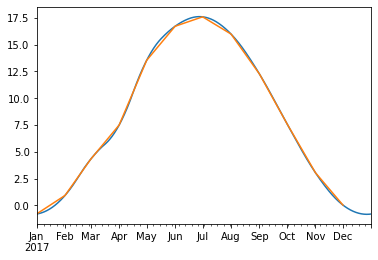

In [124]:
epw.monthly_ground_temperature[0.5].to_hourly(method="smooth").to_series().plot()
epw.monthly_ground_temperature[0.5].to_series().plot()